In [31]:
%pip install seaborn

In [179]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int32  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int32  
 5   region    1337 non-null   int32  
 6   charges   1337 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 92.2 KB


In [181]:
df['sex'].value_counts()

sex
1    675
0    662
Name: count, dtype: int64

In [182]:
df.shape

(1337, 7)

In [183]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.516081,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [184]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [185]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [186]:
df.duplicated().sum()

0

In [26]:
df = df.drop_duplicates()

In [27]:
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]


In [51]:
column = df.columns
column

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<AxesSubplot:xlabel='bmi', ylabel='Count'>

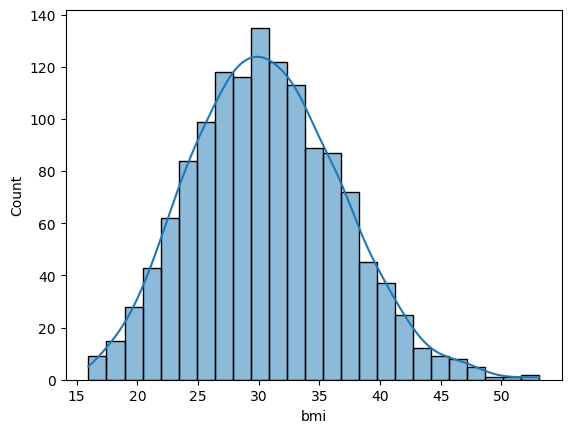

In [187]:
sns.histplot(df['bmi'], kde = True)

<AxesSubplot:xlabel='age', ylabel='Count'>

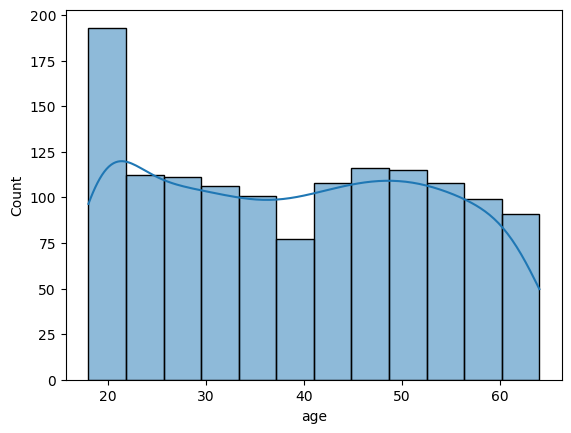

In [188]:
sns.histplot(df['age'], kde = True)

<AxesSubplot:>

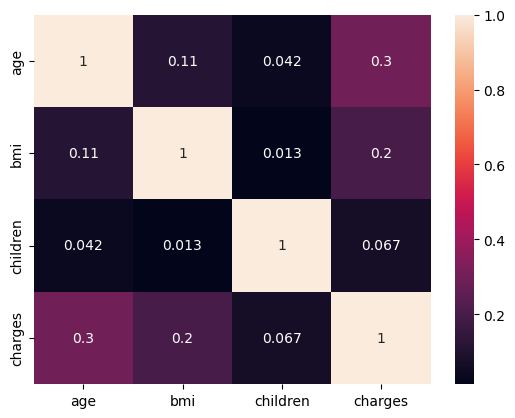

In [189]:
num_col = df.drop(['sex', 'region', 'smoker'], axis = 1)
sns.heatmap(num_col.corr(), annot = True)

<Figure size 640x480 with 0 Axes>

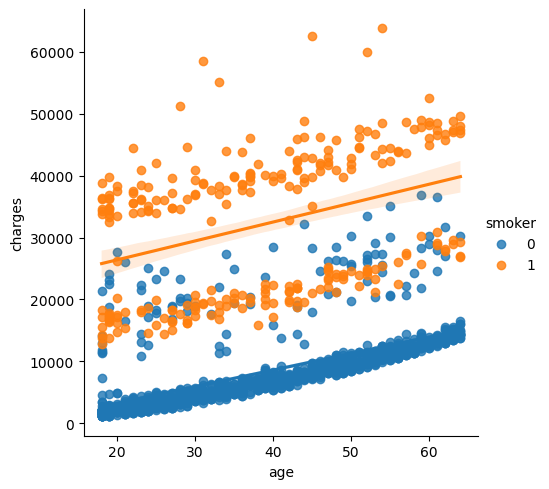

<Figure size 640x480 with 0 Axes>

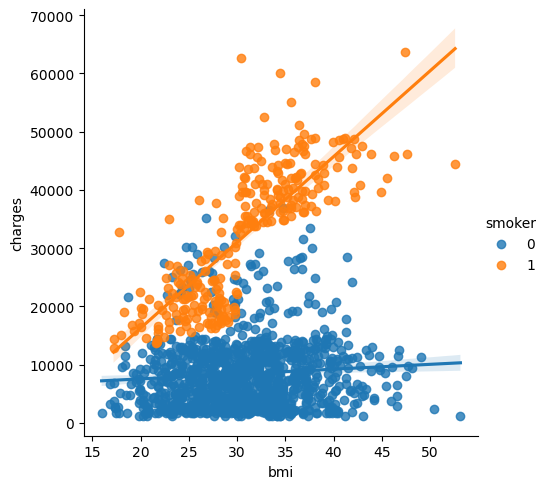

<Figure size 640x480 with 0 Axes>

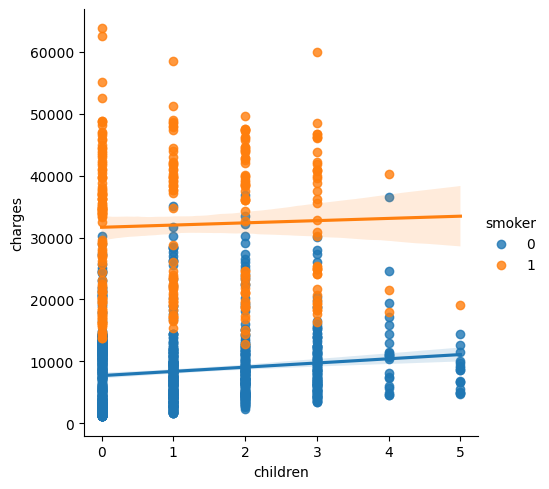

In [167]:
for feature in num_col :
    if feature == 'charges' :
        continue
        
    plt.figure()
    sns.lmplot(x = feature, y = 'charges', hue = 'smoker', data = df)
    

<AxesSubplot:xlabel='sex', ylabel='charges'>

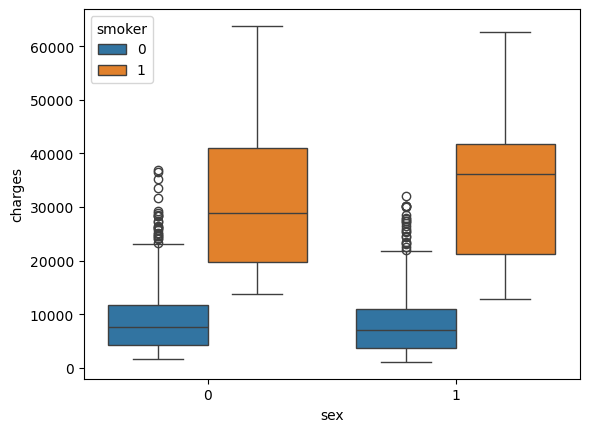

In [191]:
sns.boxplot(x = 'sex', y = 'charges', data = df, hue = 'smoker')

<AxesSubplot:xlabel='children', ylabel='charges'>

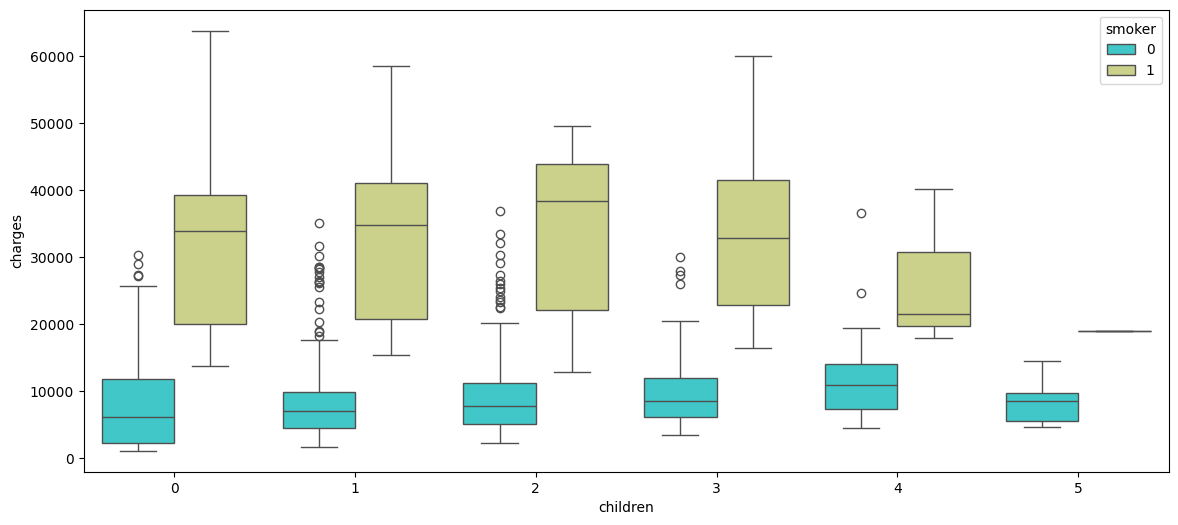

In [148]:
plt.figure(figsize=(14,6))
sns.boxplot(x = 'children', y = 'charges', hue = 'smoker', palette = 'rainbow', data = df, )

In [192]:
for column in cat_col :
    df[column] = encoder.fit_transform(df[column])

<ipython-input-192-6eac71ca2316>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = encoder.fit_transform(df[column])
<ipython-input-192-6eac71ca2316>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = encoder.fit_transform(df[column])
<ipython-input-192-6eac71ca2316>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [171]:
x = df.drop(['charges'], axis = 1)
y = df['charges']

In [197]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [194]:
x_train

,age,sex,bmi,children,smoker,region
1114,23,1,24.510,0,0,0
968,21,1,25.745,2,0,0
599,52,0,37.525,2,0,1
170,63,1,41.470,0,0,2
275,47,0,26.600,2,0,0
...,...,...,...,...,...,...
1096,51,0,34.960,2,1,0
1131,27,1,45.900,2,0,3
1295,20,1,22.000,1,0,3
861,38,0,28.000,3,0,3


In [198]:
prediction = model.predict(x_test)


In [199]:
mse = mean_squared_error(y_test, prediction)
accuracy = r2_score(y_test, prediction)

print('mse : {0}, accuracy : {1}'.format(mse,round(accuracy, 2) *100))

mse : 35493102.61165053, accuracy : 81.0
